In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_stata('data/seminar_10_school.dta')
print(df)

    obs  private  years     loginc  logptax  vote
0     1        0     10   9.770001   7.0475     1
1     2        0      8  10.021000   7.0475     0
2     3        0      4  10.021000   7.0475     0
3     4        0     13   9.433500   6.3969     0
4     5        0      3  10.021000   7.2792     1
..  ...      ...    ...        ...      ...   ...
90   91        0      3  10.222000   7.2793     1
91   92        0      3  10.021000   7.0475     1
92   93        0      5  10.021000   7.0475     1
93   94        0     35   8.922700   5.9915     1
94   95        0      3  10.463000   7.4955     0

[95 rows x 6 columns]


In [8]:
print(df.describe())

             obs    private      years     loginc    logptax       vote
count  95.000000  95.000000  95.000000  95.000000  95.000000  95.000000
mean   48.000000   0.105263   8.515789   9.971017   6.939496   0.621053
std    27.568098   0.308520   9.515791   0.411885   0.316920   0.487699
min     1.000000   0.000000   1.000000   8.294000   5.991500   0.000000
25%    24.500000   0.000000   3.000000   9.770001   6.745200   0.000000
50%    48.000000   0.000000   5.000000  10.021000   7.047500   1.000000
75%    71.500000   0.000000  10.000000  10.222000   7.047500   1.000000
max    95.000000   1.000000  49.000000  10.820000   7.495500   1.000000


Данные о доходах индивидов.

loginc - логарифм ежегодного дохода домашнего хозяйства
logptax - логарифм суммы налогов уплаченных индивидом за год
private - ходят ли дети в частную школу (1) или общую (0)
years - количество лет проживания в регионе
vote - голосовало ли д/х за (1) или против (0) некоторой инициативы

<Axes: xlabel='obs', ylabel='vote'>

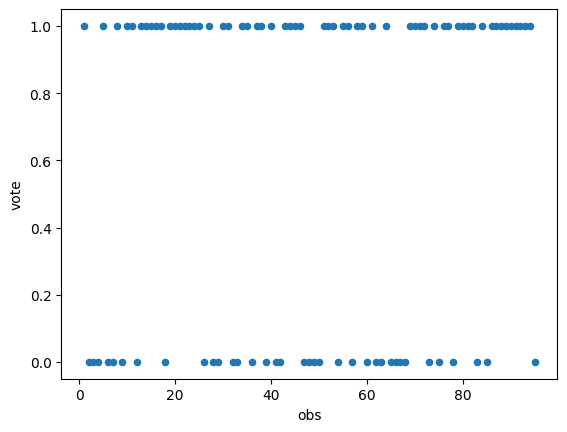

In [30]:
df.plot(x = 'obs', y = 'vote', kind = 'scatter')


<Axes: xlabel='loginc', ylabel='vote'>

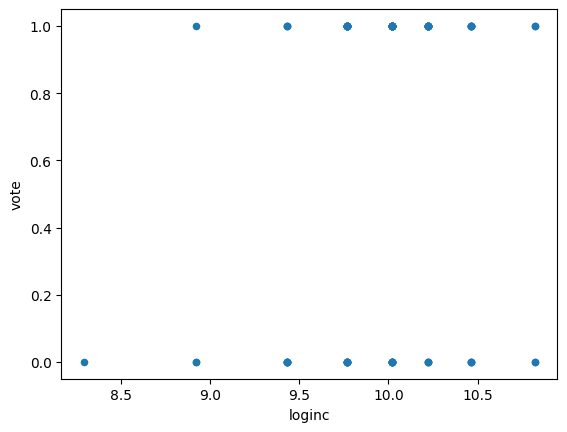

In [10]:
df.plot(x = 'loginc', y = 'vote', kind = 'scatter')


In [31]:
ols_model = smf.ols("vote ~ loginc + logptax + years + private", data = df).fit()

In [32]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   vote   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2.532
Date:                Fri, 29 Nov 2024   Prob (F-statistic):             0.0457
Time:                        15:25:00   Log-Likelihood:                -61.016
No. Observations:                  95   AIC:                             132.0
Df Residuals:                      90   BIC:                             144.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1456      1.432      0.102      0.9

In [33]:
ols_prediction = ols_model.predict(df)

In [34]:
print(ols_prediction.describe())

count    95.000000
mean      0.621053
std       0.155108
min       0.061263
25%       0.538484
50%       0.646773
75%       0.702677
max       1.045599
dtype: float64


In [36]:
ols_prediction.max()

np.float64(1.0455991903828696)

Как работает логистическая функция?

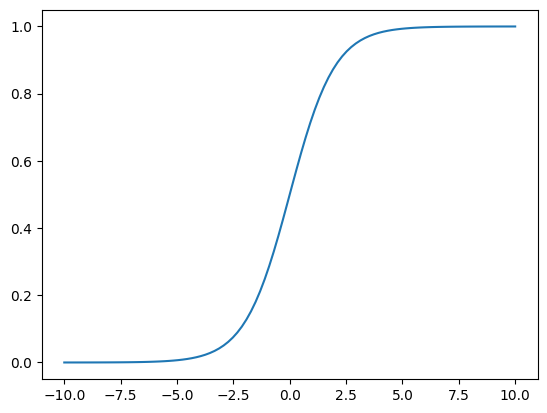

In [19]:
x = np.linspace(-10, 10, 100)
y = 1/(1+np.exp(-x))
plt.plot(x, y)

In [37]:
logit_model = smf.logit("vote ~ loginc + logptax + years + private", data = df).fit()

Optimization terminated successfully.
         Current function value: 0.610020
         Iterations 6


In [38]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                   vote   No. Observations:                   95
Model:                          Logit   Df Residuals:                       90
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                 0.08067
Time:                        15:27:32   Log-Likelihood:                -57.952
converged:                       True   LL-Null:                       -63.037
Covariance Type:            nonrobust   LLR p-value:                   0.03766
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6822      6.817     -0.247      0.805     -15.043      11.678
loginc         1.7020      0.757      2.248      0.025       0.218       3.186
logptax       -2.0795      0.960     -2.165      0.0

In [39]:
logit_prediction = logit_model.predict(df)

In [40]:
print(logit_prediction.describe())

count    95.000000
mean      0.621053
std       0.156515
min       0.093082
25%       0.531303
50%       0.653625
75%       0.715391
max       0.932358
dtype: float64


In [24]:
print(logit_prediction)

0     0.503488
1     0.621644
2     0.647328
3     0.670633
4     0.538225
        ...   
90    0.621304
91    0.653625
92    0.640980
93    0.518840
94    0.611989
Length: 95, dtype: float64


In [25]:
logit_prediction_b = logit_model.predict(df) > 0.5
logit_prediction_b

0     True
1     True
2     True
3     True
4     True
      ... 
90    True
91    True
92    True
93    True
94    True
Length: 95, dtype: bool

In [26]:
confusion_matrix = pd.crosstab(df.vote, logit_prediction_b)
confusion_matrix

col_0,False,True
vote,,
0,11,25
1,7,52


In [20]:
TN = confusion_matrix.iloc[0,0] # True negative , iloc is used to convert data frame to matrix
FP = confusion_matrix.values[0,1] # False positives
TP = confusion_matrix.values[1,1] # True positive /  right predicted true outcomes
FN = confusion_matrix.values[0,0] # False negative / right predicted false outcomes

In [21]:
#Prediction accuracy metrics:
#Specificity = TN / (TN + FP)
#Sensitivity = TP / (FN + TP)

spec = TN / (TN + FP) # proportion of True Negatives
sens = TP / (FN + TP) # proportion of True Positives

In [22]:
print('specificity equals to', round(spec, 2), 
      'sensitivity equals to', round(sens,2))

specificity equals to 0.31 sensitivity equals to 0.83


ROC кривая (например, можно почитать детально тут: https://mmuratarat.github.io/2019-10-01/how-to-compute-AUC-plot-ROC-by-hand)

In [24]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16,9)
%matplotlib inline

score = logit_prediction
y = df['vote']

# false positive rate
FPR = []
# true positive rate
TPR = []
# Iterate thresholds from 0.0 to 1.0
thresholds = np.arange(0.0, 1.01, 0.01)
# array([0. , 0.05, 0.1, 0.15, ... 1. ])

# get number of positive and negative examples in the dataset
P = sum(y)
N = len(y) - P

# iterate through all thresholds and determine fraction of true positives
# and false positives found at this threshold
for thresh in thresholds:
    FP=0
    TP=0
    thresh = round(thresh,2) #Limiting floats to two decimal points, or threshold 0.6 will be 0.6000000000000001 which gives FP=0
    for i in range(len(score)):
        if (score[i] >= thresh):
            if y[i] == 1:
                TP = TP + 1
            if y[i] == 0:
                FP = FP + 1
    FPR.append(FP/N)
    TPR.append(TP/P)
    
# FPR [1.0, 1.0, 0.5, 0.5, 0.0, 0.0]
# TPR [1.0, 1.0, 1.0, 0.5, 0.5, 0.0]

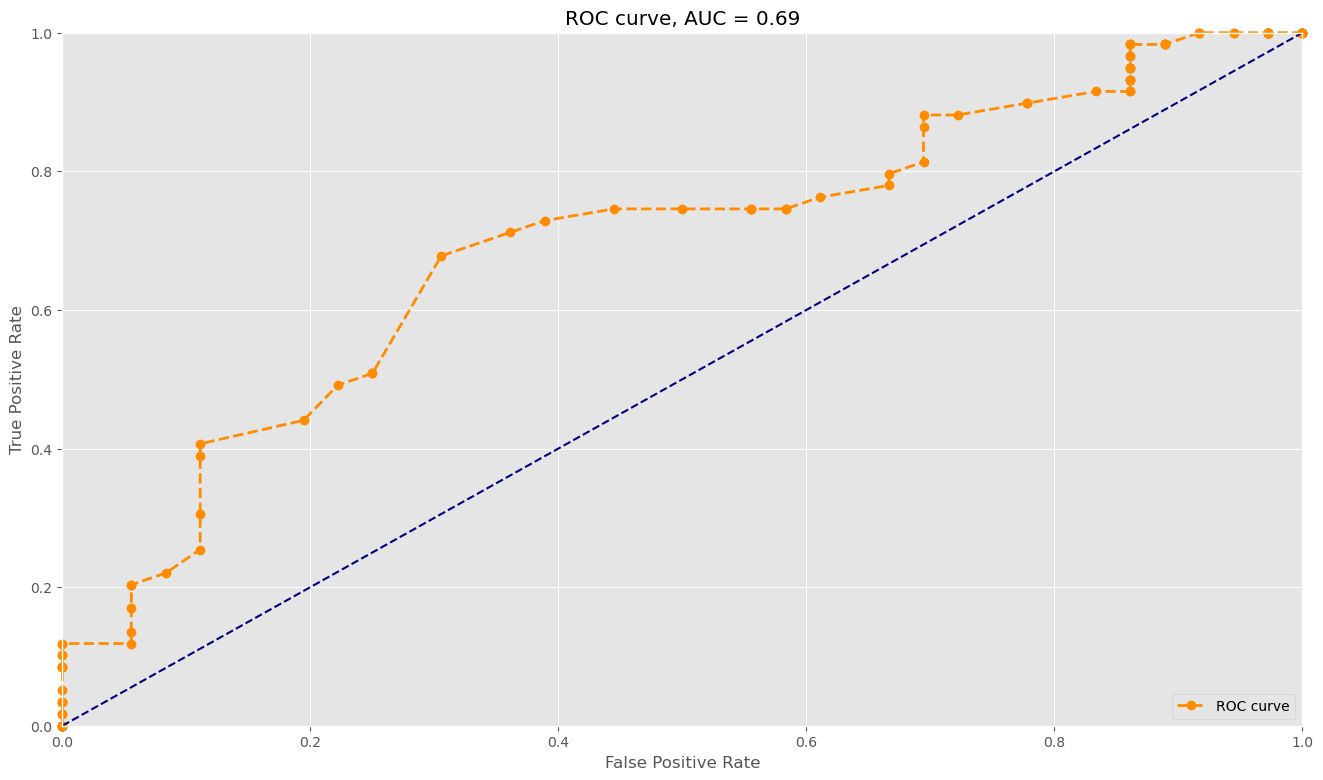

In [198]:
# This is the AUC
#you're integrating from right to left. This flips the sign of the result
auc = -1 * np.trapz(TPR, FPR)

plt.plot(FPR, TPR, linestyle='--', marker='o', color='darkorange', lw = 2, label='ROC curve', clip_on=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(loc="lower right")
plt.savefig('AUC_example.png')
plt.show()

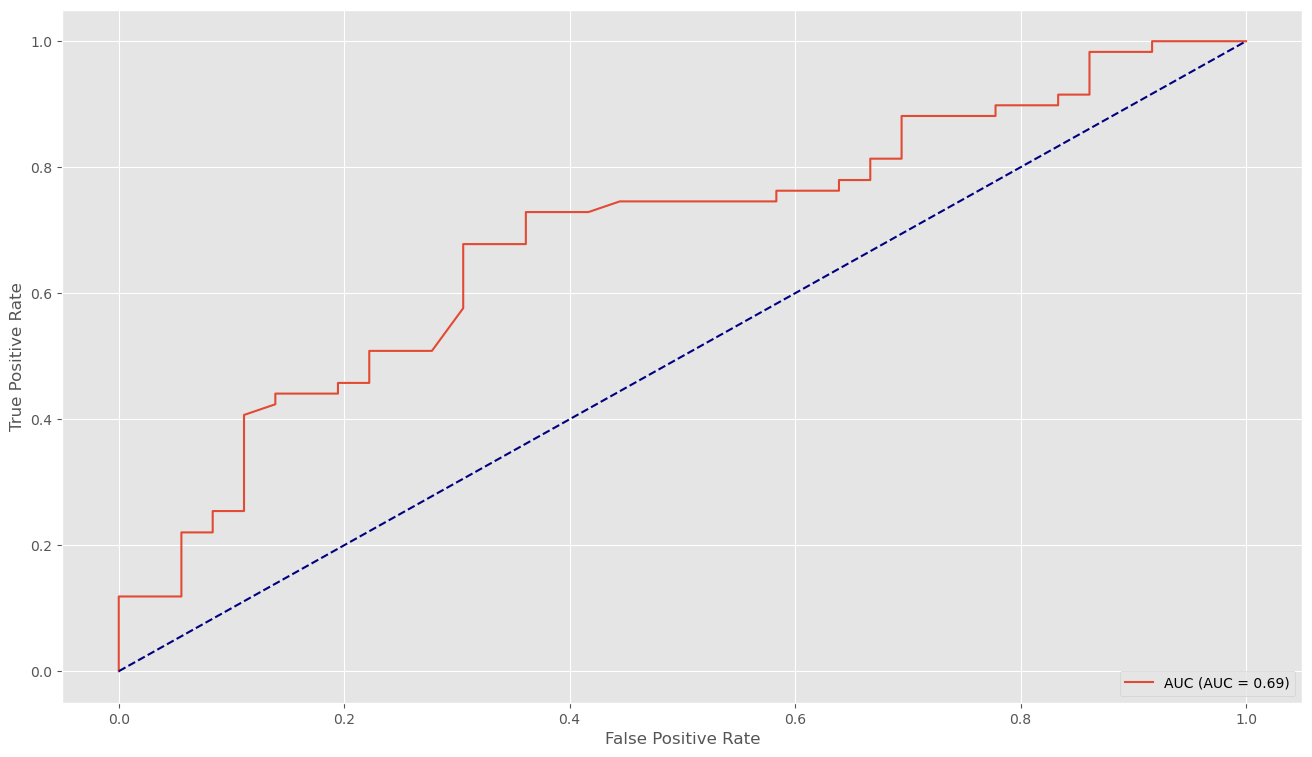

In [25]:
from sklearn import metrics
#thresholds : array, shape = [n_thresholds] Decreasing thresholds on the decision function used to compute fpr and tpr. 
#thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1
fpr, tpr, thresholds = metrics.roc_curve(y, score, pos_label=1)
#thresholds: array([1.8, 0.8, 0.6, 0.4, 0.2])
#tpr: array([0. , 0.5, 0.5, 1. , 1. ])
#fpr: array([0. , 0. , 0.5, 0.5, 1. ])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='AUC')
display.plot()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

Предельные эффекты. Marginal effects. MFX. Как интерпретировать качественно результаты logit (или probit) модели?

In [41]:
logit_model.summary()

print(logit_model.get_margeff(at ='overall').summary()) # get marginal effects
print(logit_model.get_margeff(at ='mean').summary()) # get marginal effects


# syntax
#get_margeff(at='overall', method='dydx', atexog=None, dummy=False, count=False)

# 'at' Options are:

# ‘overall’, The average of the marginal effects at each observation.

# ‘mean’, The marginal effects at the mean of each regressor.

# ‘median’, The marginal effects at the median of each regressor.

# ‘zero’, The marginal effects at zero for each regressor.

# ‘all’, The marginal effects at each observation. If at is all only margeff will be available from the returned object.

        Logit Marginal Effects       
Dep. Variable:                   vote
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loginc         0.3593      0.144      2.487      0.013       0.076       0.642
logptax       -0.4390      0.185     -2.374      0.018      -0.801      -0.077
years         -0.0058      0.005     -1.112      0.266      -0.016       0.004
private       -0.1677      0.147     -1.139      0.255      -0.456       0.121
        Logit Marginal Effects       
Dep. Variable:                   vote
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loginc         0.3961      0.176      2.250      0.024       0.0